#  EN 2550 Assignment 1 
# 190432J

([], [])

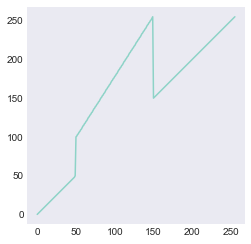

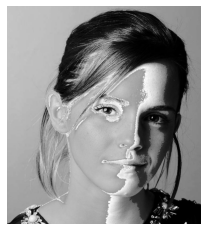

In [48]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


img_orig = cv.imread('emma_gray.jpg')

t1=np.linspace(0,50,50)
t2=np.linspace(100,255,100)
t3=np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax =plt.subplots()
ax.plot(t)
ax.set_aspect('equal')


transformed = cv.LUT(img_orig,t)
f, axarr = plt.subplots()
axarr.imshow(transformed)
axarr.set_xticks([]), axarr.set_yticks([])




([], [])

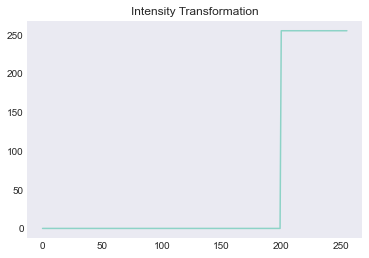

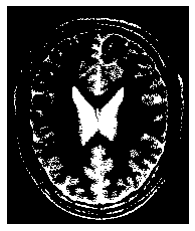

In [47]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('brain_proton_density_slice.png')
assert img_orig is not None

t1 =  np.array([0 for i in range(0,200)])
t2 =  np.array ([255 for i in  range (200,256)])
transform  = np.concatenate((t1,t2),axis =0)
assert len(transform)==256

fig,ax =plt.subplots()
ax.plot(transform)
ax.set_title("Intensity Transformation")

trandformed_img = cv.LUT(img_orig,transform)

fig,ax =plt.subplots()
plt.imshow(trandformed_img)
ax.set_xticks([]), ax.set_yticks([])




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], [])

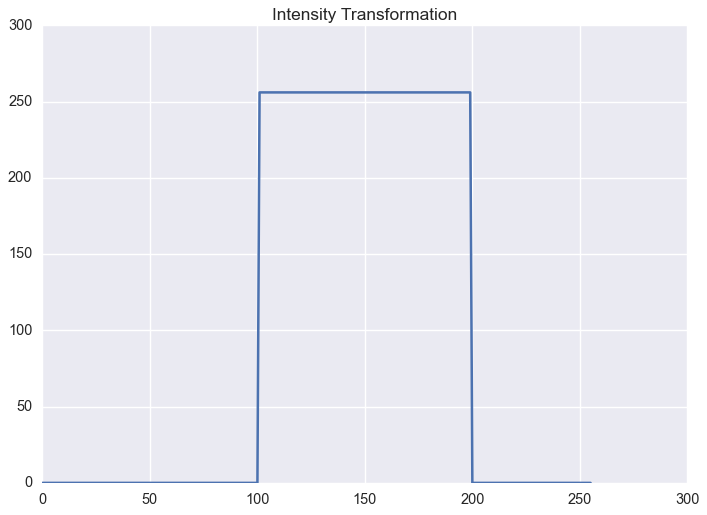

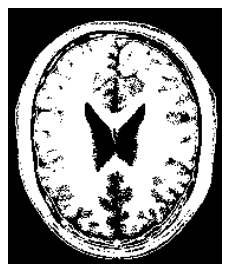

In [61]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('brain_proton_density_slice.png')
assert img_orig is not None

t1 =  np.array([0 for i in range(0,101)])
t2 =  np.array ([256 for i in  range (101,200)])
t3 =  np.array ([0 for i in  range (200,256)])

transform  = np.concatenate((t1,t2,t3),axis =0)
assert len(transform)==256

fig,ax =plt.subplots()
ax.plot(transform)
ax.set_title("Intensity Transformation")


trandformed_img = cv.LUT(img_orig,transform)

fig,ax =plt.subplots(figsize = (4,4))
plt.imshow(trandformed_img)
ax.set_xticks([]), ax.set_yticks([])



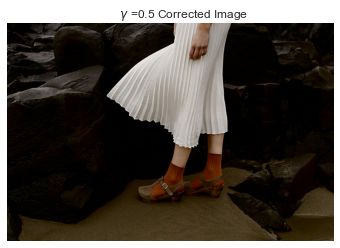

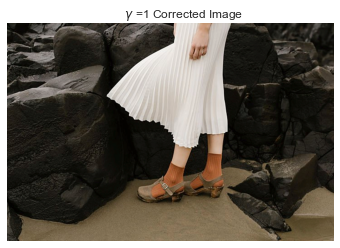

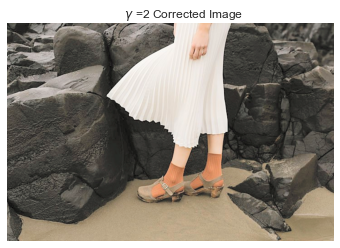

In [44]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert img is not None


gamma_list = [0.5,1,2]
for gamma in gamma_list:
    img_LAB = cv.cvtColor(img, cv.COLOR_BGR2LAB)

    table = np.array([(i/255.0)**(1/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
    
    L , A, B = cv.split(img_LAB)
    L_new = cv.LUT(L,table)
    img_transformed = cv.merge((L_new,A,B))
    fig , ax =  plt.subplots()
    ax.set_xticks([]), ax.set_yticks([])
    ax.imshow(cv.cvtColor(img_transformed,cv.COLOR_LAB2RGB))
    ax.set_title("	$\gamma$ ={} Corrected Image".format(gamma))
    plt.style.use('seaborn-dark')



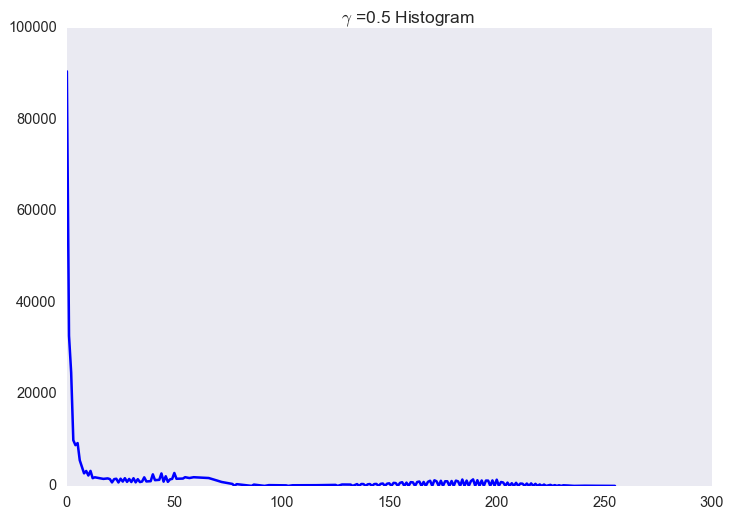

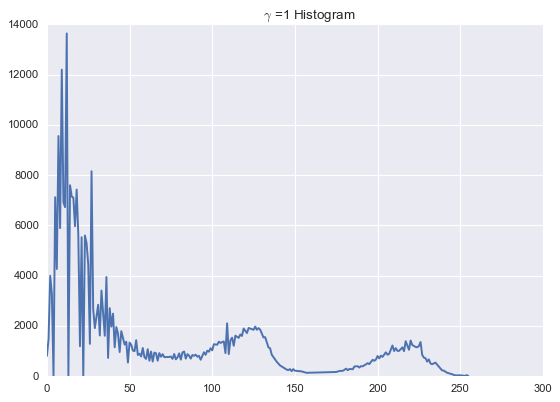

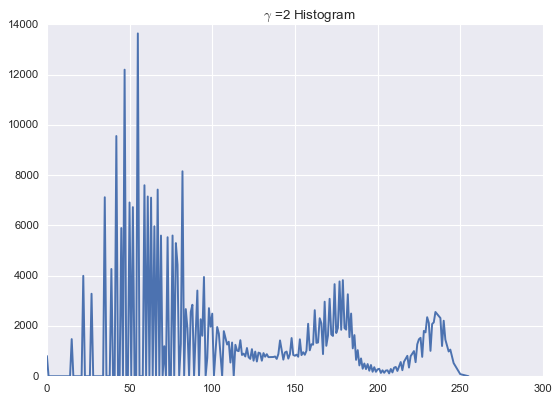

In [55]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert img is not None


gamma_list = [0.5,1,2]
for gamma in gamma_list:
    img_LAB = cv.cvtColor(img, cv.COLOR_BGR2LAB)

    table = np.array([(i/255.0)**(1/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
    
    L , A, B = cv.split(img_LAB)
    L_new = cv.LUT(L,table)
    img_transformed = cv.merge((L_new,A,B))
    fig , ax =  plt.subplots()
    hist = cv.calcHist([img_transformed],[0],None,[256],[0,255])
    ax.plot(hist)
    ax.set_title("	$\gamma$ ={} Histogram".format(gamma))
    plt.style.use('seaborn')


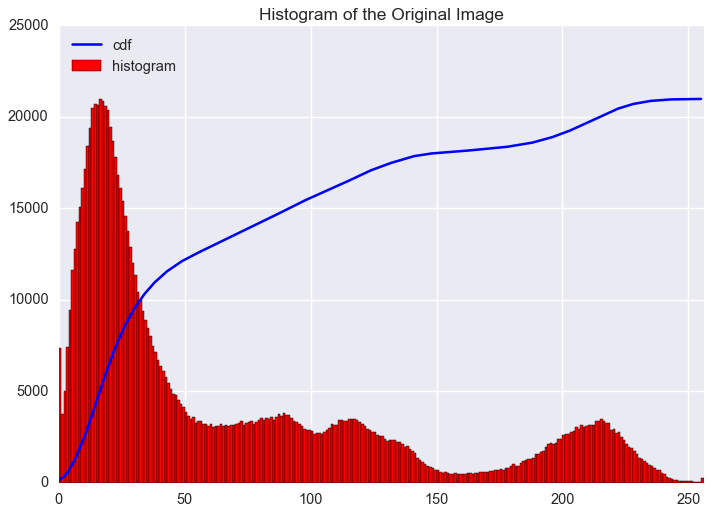

In [56]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-talk')

img_orig = cv.imread('shells.png')
assert img_orig is not None

hist,bins = np.histogram(img.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histogram of the Original Image')
plt.show()

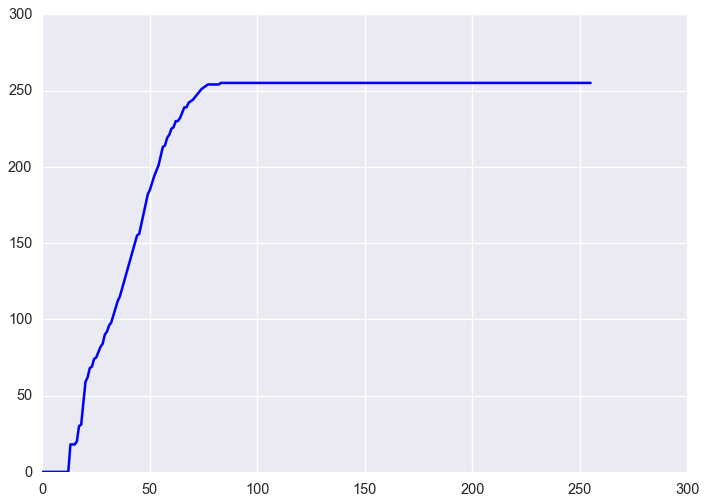

In [74]:
def HistEqualize(img):
    hist = cv.calcHist([img],[0],None,[256],[0,255])
    N = len(hist)
    # Find cumulative frequency of histogram
    for i in range (1,N):
        hist[i]= hist[i-1] + hist[i]
    N = hist[-1]
    #Normalizing
    for i in range (len(hist)):
        hist[i] = (hist[i]*255)/ N

    img_eq = [int(x) for x in hist]
    hist_1 = np.array(img_eq)

    return hist_1

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-talk')

img_orig = cv.imread('shells.png')
assert img_orig is not None

equ = HistEqualize(img_orig)


plt.plot(equ,  color = 'b')

plt.show()






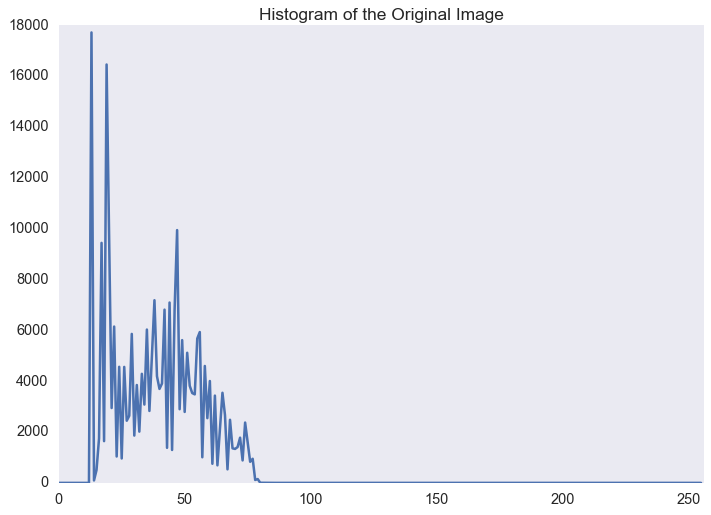

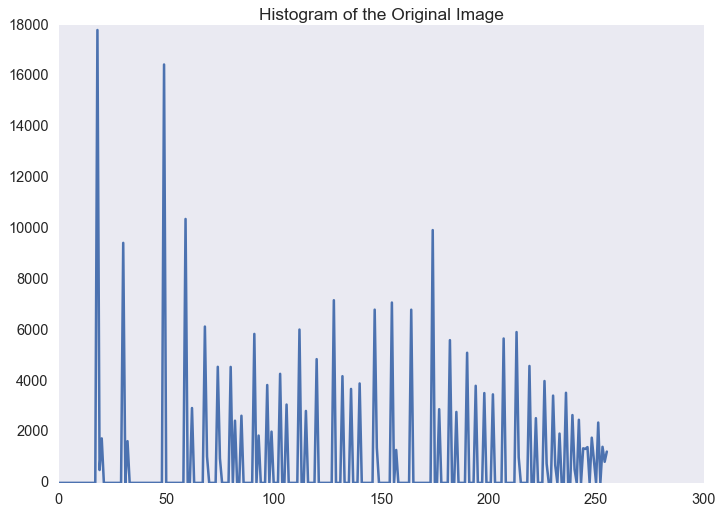

In [116]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.style.use('seaborn-dark')

fig , ax =  plt.subplots()

ax.set_xlim([0,256])
ax.plot(hist)
ax.set_title('Histogram of the Original Image')


def HistEqualize(img):

    hist = np.zeros((1,256))
    for i in range(0,256):
        hist[0][i] = np.count_nonzero(img==i)

    rows , cols = img.shape

    equalized_histogram = np.zeros((1,256))

    for i in range(0,256):
        S = (255/(rows*cols))*np.sum(hist[:,:i+1])
        equalized_histogram[0][i] = round(S)

    hist_equalized_img = cv.LUT(img, equalized_histogram)

    hist_eqalized = np.zeros((1,256))

    for i in range(0,256):
        hist_eqalized[0][i] = np.count_nonzero(hist_equalized_img==i)
 
    return hist_eqalized[0]

fig , ax =  plt.subplots()

eq = HistEqualize(img)
ax.plot(eq)
ax.set_title('Histogram of the Original Image')



plt.show()



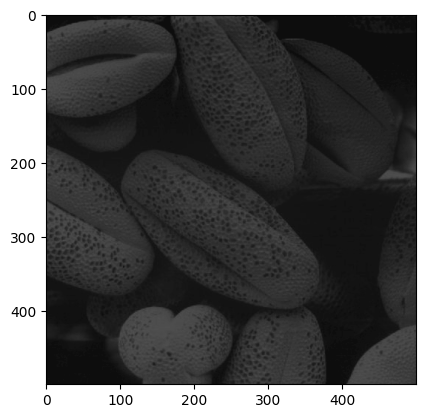

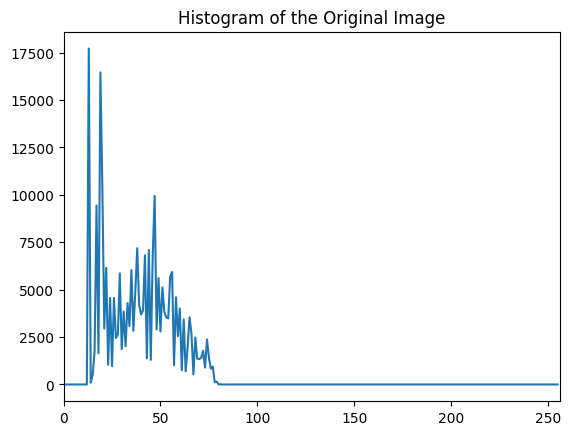

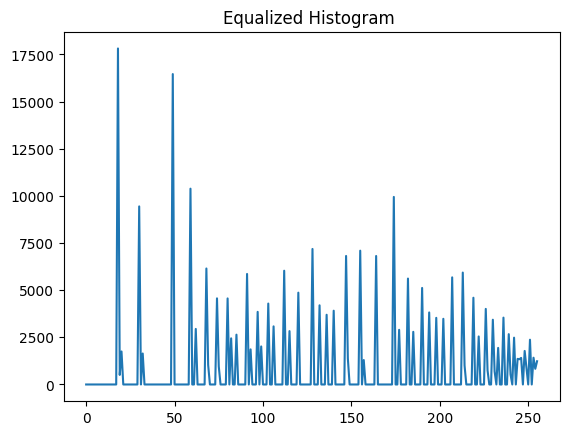

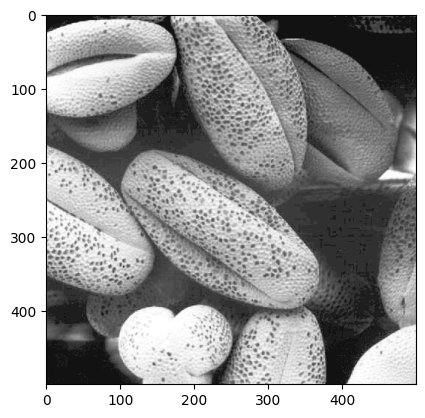

In [130]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.style.use('default')

fig , ax =  plt.subplots()


ax.imshow(img, cmap = 'gray' , vmin=0 , vmax =255)

fig , ax =  plt.subplots()

ax.set_xlim([0,256])
ax.plot(hist)
ax.set_title('Histogram of the Original Image')


def HistEqualize(img):

    hist = np.zeros((1,256))
    for i in range(0,256):
        hist[0][i] = np.count_nonzero(img==i)

    rows , cols = img.shape

    equalized_histogram = np.zeros((1,256))

    for i in range(0,256):
        S = (255/(rows*cols))*np.sum(hist[:,:i+1])
        equalized_histogram[0][i] = round(S)

    hist_equalized_img = cv.LUT(img, equalized_histogram)

    hist_eqalized = np.zeros((1,256))

    for i in range(0,256):
        hist_eqalized[0][i] = np.count_nonzero(hist_equalized_img==i)
    
 
    return hist_eqalized[0] , hist_equalized_img

fig , ax =  plt.subplots()

eq , eq_img = HistEqualize(img)
ax.plot(eq)
ax.set_title('Equalized Histogram ')

fig , ax =  plt.subplots()
ax.imshow(eq_img, cmap = 'gray', vmin =0, vmax =255)

plt.show()

13830386433 21236254210 26235176489


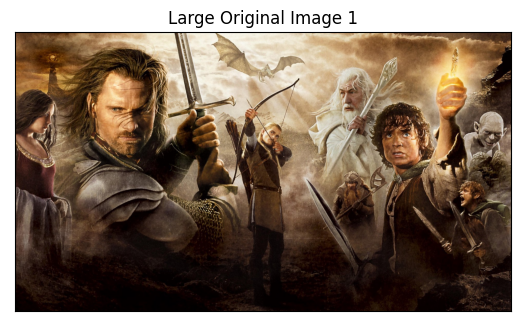

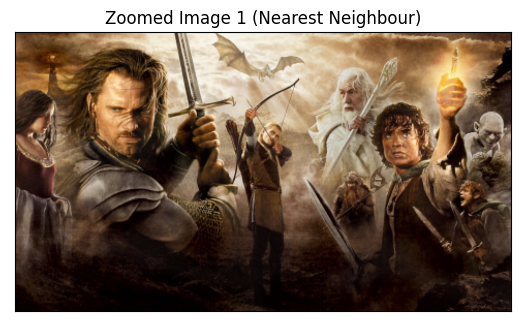

In [148]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('shells.png',cv.IMREAD_GRAYSCALE)

def total(SSD) :
    img_rows , img_cols , colours = SSD.shape
    B_SSD = 0
    G_SSD = 0
    R_SSD = 0

    for r in range(img_rows):
        for c in range(img_cols):
            B_SSD , G_SSD , R_SSD = np.array([B_SSD,G_SSD,R_SSD])+ SSD[r][c]

    return B_SSD , G_SSD, R_SSD

def USandNN (image , factor): # upsample and nearest neighbour
    img_rows, img_cols , colours = image.shape
    img_upsample = np.zeros([img_rows*factor, img_cols*factor, 3], dtype = 'uint8')
    for r in range(img_rows):
        for c in range(img_cols):
            for f_r in range(factor):
                for f_c in range(factor):
                    img_upsample[r*factor + f_r ][c*factor + f_c] = image[r][c]
    
    return img_upsample


Large_img1 = cv.imread('im01.png',cv.IMREAD_COLOR)
fig , ax = plt.subplots()
ax.imshow(cv.cvtColor(Large_img1,cv.COLOR_BGR2RGB))
ax.set_title("Large Original Image 1")
ax.set_xticks([]), ax.set_yticks([])

Small_img1 = cv.imread('im01small.png',cv.IMREAD_COLOR)
zoomed_img = USandNN(Small_img1,4)

fig , ax = plt.subplots()
ax.imshow(cv.cvtColor(zoomed_img,cv.COLOR_BGR2RGB))
ax.set_title("Zoomed Image 1 (Nearest Neighbour)")
ax.set_xticks([]), ax.set_yticks([])
cv.imwrite('im1zoomed.jpg', zoomed_img)
SSD = Large_img1.astype('int64') - zoomed_img.astype('int64')[-1:] 
SSD = SSD**2
B_SSD , G_SSD , R_SSD = total(SSD)
print(B_SSD, G_SSD, R_SSD)




7078852028 7286550162 7507441830


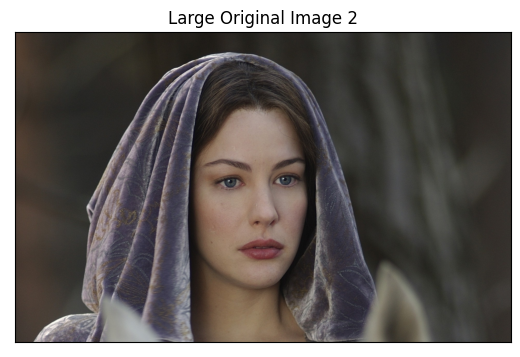

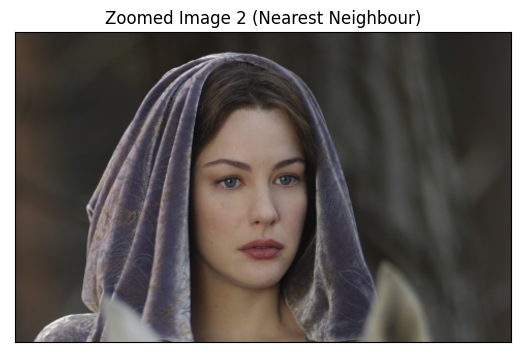

In [152]:
Large_img2 = cv.imread('im02.png',cv.IMREAD_COLOR)
fig , ax = plt.subplots()
ax.imshow(cv.cvtColor(Large_img2,cv.COLOR_BGR2RGB))
ax.set_title("Large Original Image 2")
ax.set_xticks([]), ax.set_yticks([])

Small_img2 = cv.imread('im02small.png',cv.IMREAD_COLOR)
zoomed_img = USandNN(Small_img2,4)

fig , ax = plt.subplots()
ax.imshow(cv.cvtColor(zoomed_img,cv.COLOR_BGR2RGB))
ax.set_title("Zoomed Image 2 (Nearest Neighbour)")
ax.set_xticks([]), ax.set_yticks([])
cv.imwrite('im2zoomed.jpg', zoomed_img)
SSD = Large_img2.astype('int64') - zoomed_img.astype('int64')[-1:] 
SSD = SSD**2
B_SSD , G_SSD , R_SSD = total(SSD)
print(B_SSD, G_SSD, R_SSD)


16030818348 14403656397 12083672322


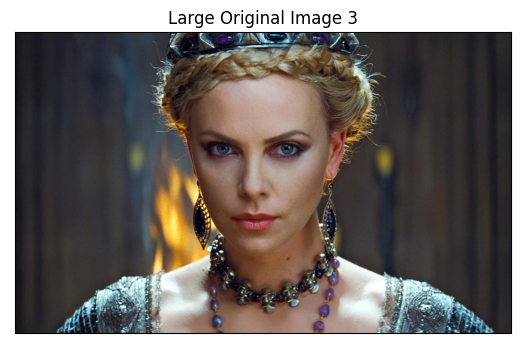

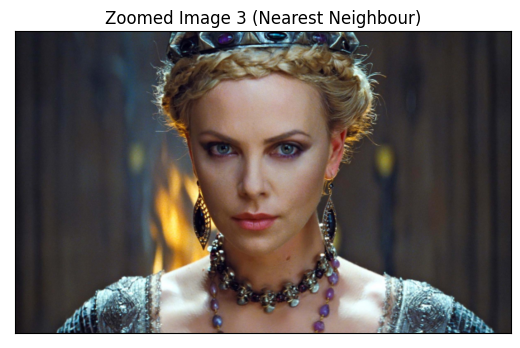

In [153]:
Large_img3 = cv.imread('im03.png',cv.IMREAD_COLOR)
fig , ax = plt.subplots()
ax.imshow(cv.cvtColor(Large_img3,cv.COLOR_BGR2RGB))
ax.set_title("Large Original Image 3")
ax.set_xticks([]), ax.set_yticks([])

Small_img3 = cv.imread('im03small.png',cv.IMREAD_COLOR)
zoomed_img = USandNN(Small_img3,4)

fig , ax = plt.subplots()
ax.imshow(cv.cvtColor(zoomed_img,cv.COLOR_BGR2RGB))
ax.set_title("Zoomed Image 3 (Nearest Neighbour)")
ax.set_xticks([]), ax.set_yticks([])
cv.imwrite('im3zoomed.jpg', zoomed_img)
SSD = Large_img3.astype('int64') - zoomed_img.astype('int64')[-1:] 
SSD = SSD**2
B_SSD , G_SSD , R_SSD = total(SSD)
print(B_SSD, G_SSD, R_SSD)
